# Kriteria 1: Data merupakan hasil scraping secara mandiri
get 3000 review from google maps of Borobudur temple

In [5]:
import pandas as pd
import nltk
import tensorflow as tf
import keras

# print("TF version:", keras.__version__)
# print("Keras module path:", keras.__file__)
# print("Keras version:", getattr(keras, '__version__', 'n/a'))

nltk.download('punkt')
nltk.download('stopwords')
#========== use this before get the csv (uncomment)==========
# scrapreview = reviews_all(
#     'com.zte.iptvclient.android.idmnc',
#     lang='id',
#     country='id',
#     sort=Sort.MOST_RELEVANT,
#     count=3000
# )

# app_reviews_df = pd.DataFrame(scrapreview)
# app_reviews_df.shape
# app_reviews_df.head()
# app_reviews_df.to_csv('vplus_review.csv', index=False)

# app_reviews_df = pd.DataFrame(scrapreview)
#========== end use this before get the csv ==========

# ========== use this after get the csv ==========
app_reviews_df = pd.read_csv('rnd/dataset.csv')
app_reviews_df

[nltk_data] Downloading package punkt to /Users/fepriyadi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fepriyadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/m7/sjw8yb_1677_b06x0yxyy00m0000gq/T/ipykernel_51035/4230898849.py:30: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  app_reviews_df = pd.read_csv('rnd/dataset.csv')


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,6916c330-f965-4dc5-a73e-7e9b84ec1354,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ga di aplikasi, ga di google sama aja . berart...",1,42,11.5.1(17)_prd vision+ ahh,2025-10-11 16:18:13,Hai kak 👋 terima kasih sudah menyempatkan kasi...,2025-10-11 16:19:07,11.5.1(17)_prd vision+ ahh
1,851dc45a-deb6-4bf0-bdd3-cfa7b130d6f7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,jelek bnget sekarang layarnya gelap siaran TV ...,1,17,11.5.1(17)_prd vision+ ahh,2025-10-18 10:49:11,"Halo kak, makasih sudah mau kasih feedback juj...",2025-10-18 11:04:08,11.5.1(17)_prd vision+ ahh
2,a388adba-b3dc-453c-a8c3-333ecccba5b7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gak ada yg bisa di tonton. .aplikasi kacau..ja...,1,4,11.5.1(17)_prd vision+ ahh,2025-10-12 23:16:46,Hai kak 👋 terima kasih sudah menyempatkan kasi...,2025-10-12 23:17:45,11.5.1(17)_prd vision+ ahh
3,65bd63a8-8f89-4eb8-9c91-7781157f95a7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sangat buruk, saya beli paket tidak bisa nonto...",1,3,11.5.1(17)_prd vision+ ahh,2025-10-13 22:02:11,Hai kak 👋 terima kasih sudah menyempatkan kasi...,2025-10-13 22:19:16,11.5.1(17)_prd vision+ ahh
4,50b68e29-4d81-43fb-8c94-6956d91b78be,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya install krn ada paket internet bundling 3...,1,106,11.5.1(5)_prd vision+ ahh,2025-09-07 06:08:46,Hai kak 👋 terima kasih sudah kasih review mesk...,2025-09-11 16:21:04,11.5.1(5)_prd vision+ ahh
...,...,...,...,...,...,...,...,...,...,...,...
74217,3088884c-3e08-4a85-9a96-aa61223b3120,Mirham Firli,https://play-lh.googleusercontent.com/a-/ALV-U...,👍👍👍,2,0,NaN,2023-09-24 00:21:11,"Hai kak, Kami sangat menghargai kritik dan sar...",2023-09-24 12:24:26,NaN
74218,04a165da-4512-404b-a8f2-f8633fb5a332,Ayun Umami,https://play-lh.googleusercontent.com/a/ACg8oc...,😟,2,0,NaN,2022-02-17 16:50:15,Terima kasih atas review-nya. Vision+ akan ter...,2022-02-17 18:34:26,NaN
74219,c16b0af7-9c64-4e10-9862-cf205b772830,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,🤔,2,0,NaN,2019-04-10 19:21:37,"Terima kasih atas review-nya, kami sangat meng...",2019-04-11 08:27:46,NaN
74220,0c221d28-05fc-4537-95ab-5d1ba58580ed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,NaN,5,0,NaN,2015-03-23 02:11:01,NaN,NaN,NaN


In [6]:

app_reviews_df['app_reviews_df'] = app_reviews_df['content'].fillna('')  
clean_df = app_reviews_df.dropna().drop_duplicates().reset_index(drop=True)
clean_df = clean_df.head(10000)
clean_df['content'].isna().sum()

0

In [7]:
len(clean_df)

clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,app_reviews_df
0,6916c330-f965-4dc5-a73e-7e9b84ec1354,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ga di aplikasi, ga di google sama aja . berart...",1,42,11.5.1(17)_prd vision+ ahh,2025-10-11 16:18:13,Hai kak 👋 terima kasih sudah menyempatkan kasi...,2025-10-11 16:19:07,11.5.1(17)_prd vision+ ahh,"Ga di aplikasi, ga di google sama aja . berart..."
1,851dc45a-deb6-4bf0-bdd3-cfa7b130d6f7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,jelek bnget sekarang layarnya gelap siaran TV ...,1,17,11.5.1(17)_prd vision+ ahh,2025-10-18 10:49:11,"Halo kak, makasih sudah mau kasih feedback juj...",2025-10-18 11:04:08,11.5.1(17)_prd vision+ ahh,jelek bnget sekarang layarnya gelap siaran TV ...
2,a388adba-b3dc-453c-a8c3-333ecccba5b7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gak ada yg bisa di tonton. .aplikasi kacau..ja...,1,4,11.5.1(17)_prd vision+ ahh,2025-10-12 23:16:46,Hai kak 👋 terima kasih sudah menyempatkan kasi...,2025-10-12 23:17:45,11.5.1(17)_prd vision+ ahh,gak ada yg bisa di tonton. .aplikasi kacau..ja...
3,65bd63a8-8f89-4eb8-9c91-7781157f95a7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sangat buruk, saya beli paket tidak bisa nonto...",1,3,11.5.1(17)_prd vision+ ahh,2025-10-13 22:02:11,Hai kak 👋 terima kasih sudah menyempatkan kasi...,2025-10-13 22:19:16,11.5.1(17)_prd vision+ ahh,"sangat buruk, saya beli paket tidak bisa nonto..."
4,50b68e29-4d81-43fb-8c94-6956d91b78be,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya install krn ada paket internet bundling 3...,1,106,11.5.1(5)_prd vision+ ahh,2025-09-07 06:08:46,Hai kak 👋 terima kasih sudah kasih review mesk...,2025-09-11 16:21:04,11.5.1(5)_prd vision+ ahh,Saya install krn ada paket internet bundling 3...
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5c3436fb-eb08-4b7f-a6e9-d7c2d5b52b60,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,susah banget aplikasinya baru aja masuk keluar...,2,0,6.20.0,2022-10-13 18:15:14,Hi Kak Agustina...Mohon Maaf atas ketidaknyama...,2022-10-13 18:25:57,6.20.0,susah banget aplikasinya baru aja masuk keluar...
9996,30e36c9a-3344-42e0-8d1a-0b71bd0522e4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mantap,di perjalanan tetep bisa nonton tv",5,0,6.4.6,2021-08-14 00:06:43,"Terima kasih atas review-nya, selamat menikmat...",2021-08-14 01:11:00,6.4.6,"Mantap,di perjalanan tetep bisa nonton tv"
9997,6cb677ce-ab8d-472e-95ec-6237c43e1fc3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya gak bisa login lelet dan semakin b...,1,1,6.30.0,2023-08-13 16:56:50,Hi Vilenialls...Mohon Maaf atas ketidaknyamana...,2023-08-13 17:47:19,6.30.0,Aplikasinya gak bisa login lelet dan semakin b...
9998,46c86c8a-f690-4836-8a37-8256ec901678,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kok siaran kemarin ada yg gabisa diputar kenap...,3,0,6.0.1,2020-11-02 12:10:05,Mohon Maaf atas ketidaknyamanannya. Silakan co...,2020-11-02 12:27:25,6.0.1,Kok siaran kemarin ada yg gabisa diputar kenap...


# Preprocessing

In [8]:
import re
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
import stanza
from nltk.corpus import stopwords
import unicodedata
from rapidfuzz import process, fuzz
from pathlib import Path

cache_dir = Path("rnd/cache")
cache_dir.mkdir(exist_ok=True)
fixed_cache = cache_dir / "text_fixedtypo.pkl"
lemmatized_cache = cache_dir / "text_lemmatized.pkl"

stem_map_path = "stem_map.json"

factory = StemmerFactory()
stemmer = factory.create_stemmer()
stanza.download('id') 
factory = StopWordRemoverFactory()
slangwords = {"gak":"tidak","ga": "tidak","gaa": "tidak","engga": "tidak","enggak": "tidak","ampas": "buruk","@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "yg": "yanng"}
nlp_id = stanza.Pipeline(lang='id', processors='tokenize,lemma', use_gpu=False, verbose=False)

#stopwords
stopwords_sastrawi = set(factory.get_stop_words())
stopwords_id = set(stopwords.words('indonesian'))
stopwords_en = set(stopwords.words('english'))
all_stopwords = stopwords_sastrawi | stopwords_en | stopwords_id

# build unique vocabulary (tokens)
vocab = set()
domain_vocab = list(vocab)  # or extend with known correct tokens

def cleaningText(text):
    if not isinstance(text, str):
        return ""
    # normalize unicode, remove control/invisible chars
    text = unicodedata.normalize("NFKC", text)
    text = re.sub(r'[\r\n\t]+', ' ', text)
    # remove mentions, hashtags, urls, digits
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r"[0-9]+", '', text)
    # remove characters other than letters/spaces (keeps internal whitespace)
    text = re.sub(r'[^A-Za-z\u00C0-\u024F\u1E00-\u1EFF\s]', ' ', text)
    # collapse whitespace and trim
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    return [kata for kata in text if kata.lower() not in all_stopwords]

#Stemming text
# ...existing code...
def stemmingText(words, stem_map):
    # expect `words` to be a list of tokens and return a list of stemmed tokens
    if words is None:
        return []
    # if tokens were accidentally joined into a string, split safely
    if isinstance(words, str):
        words = words.split()
    # ensure we have an iterable list/tuple
    if not isinstance(words, (list, tuple)):
        return []
    return [stem_map.get(w, w) for w in words]
# ...existing code...

def toSentence(list_words):
    # handle both list and already-joined string safely
    if isinstance(list_words, str):
        return list_words
    return ' '.join(list_words)

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

def fuzzy_fix_token(token, choices=domain_vocab, score_cutoff=80):
    match = process.extractOne(token, choices, scorer=fuzz.ratio, score_cutoff=score_cutoff)
    return match[0] if match else token

def fix_typo_sentence(text):
    tokens = text.split()
    return ' '.join(fuzzy_fix_token(t) for t in tokens)

#start preprocessing pipeline
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

clean_df['text_caseFoldingText'] = clean_df['text_clean'].apply(casefoldingText)

clean_df['text_slangwords'] = clean_df['text_caseFoldingText'].apply(fix_slangwords)

#========== fix typo start ==========
texts = clean_df['text_slangwords'].astype(str).tolist()

if fixed_cache.exists():
    print("Loading cached typo results:", fixed_cache)
    cached = pd.read_pickle(fixed_cache)
    if len(cached) == len(clean_df):
        clean_df["text_fixedtypo"] = cached.values
    else:
        print(f"Cache length mismatch; recomputing typo {len(cached)} | {len(clean_df)}")
        fixed_cache.unlink()  # remove bad cache and fall through to recompute

if not fixed_cache.exists():
    texts = clean_df["text_slangwords"].astype(str).tolist()
    texts_fixed = [fix_typo_sentence(t) for t in texts]   # cheap typo-fix step
    lemmas_out = []
    for txt in tqdm(texts_fixed, desc="typo (stanza)", total=len(texts_fixed)):
        doc = nlp_id(txt)
        s = [w.lemma if w.lemma else w.text for sent in doc.sentences for w in sent.words]
        lemmas_out.append(" ".join(s))
    clean_df["text_fixedtypo"] = lemmas_out
    pd.to_pickle(clean_df["text_fixedtypo"], fixed_cache)
    print("Saved typo results to cache:", fixed_cache)
#========== fix typo end =================

clean_df['text_tokenizingText'] = clean_df['text_fixedtypo'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

pd.to_pickle(clean_df[["content", "text_akhir"]], cache_dir / "clean_df_preprocessed.pkl")


Loading cached typo results: rnd/cache/text_fixedtypo.pkl


In [9]:
clean_df['text_stopword']

0       [aplikasi, google, aja, arti, emng, udh, bikin...
1       [jelek, bnget, layar, gelap, siar, tv, coba, l...
2       [yanng, tonton, aplikasi, kacau, jaring, error...
3       [buruk, beli, paket, nonton, yanng, kali, pake...
4       [install, krn, paket, internet, bundling, akse...
                              ...                        
9995    [susah, banget, aplikasi, aja, masuk, gitu, ud...
9996                   [mantap, jalan, tetep, nonton, tv]
9997                      [aplikasi, login, lelet, buruk]
9998                [siar, kemarin, yanng, gabisa, putar]
9999    [knpa, sulit, langgan, aktif, tpi, gk, konek, tv]
Name: text_stopword, Length: 10000, dtype: object

# Kriteria 2: Melakukan tahapan ekstraksi fitur dan pelabelan data

In [10]:
import csv
import requests
from io import StringIO
import matplotlib.pyplot as plt

# membaca data kamus kata-kata positif dari github
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

<function matplotlib.pyplot.show(close=None, block=None)>

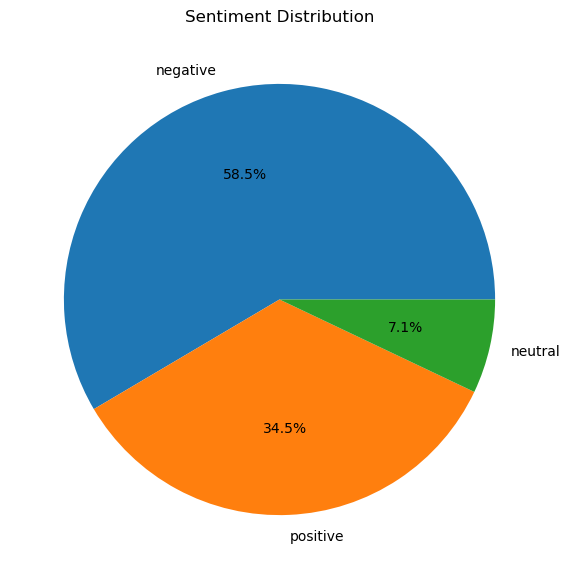

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if(word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:

        if(word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity = ''
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

# print(clean_df['polarity'].value_counts())

plt.figure(figsize=(7, 7))
plt.pie(clean_df['polarity'].value_counts(), labels=clean_df['polarity'].value_counts().index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show

Class counts:
 polarity
negative    5849
positive    3446
neutral      705
Name: count, dtype: int64

Class percents (%):
 polarity
negative    58.49
positive    34.46
neutral      7.05
Name: proportion, dtype: float64

Imbalance ratio (largest / smallest): 8.30
=> Strongly imbalanced


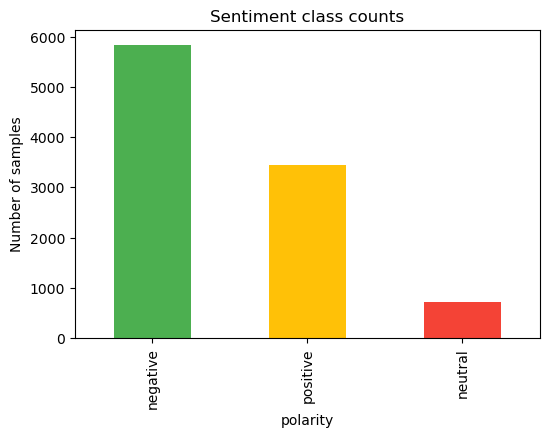

In [12]:
# ...existing code...
counts = clean_df['polarity'].value_counts()
percents = clean_df['polarity'].value_counts(normalize=True) * 100

print("Class counts:\n", counts)
print("\nClass percents (%):\n", percents.round(2))

# imbalance ratio
imbalance_ratio = counts.max() / counts.min() if counts.min() > 0 else float('inf')
print(f"\nImbalance ratio (largest / smallest): {imbalance_ratio:.2f}")

if imbalance_ratio <= 1.5:
    print("=> Distribution roughly balanced")
elif imbalance_ratio <= 2.5:
    print("=> Moderately imbalanced")
else:
    print("=> Strongly imbalanced")

# quick bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
counts.plot(kind='bar', color=['#4CAF50','#FFC107','#F44336'])
plt.title("Sentiment class counts")
plt.ylabel("Number of samples")
plt.show()

# Kriteria 3: Menggunakan algoritma pelatihan machine learning

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize
from sklearn.utils.class_weight import compute_class_weight

# ======== 1️⃣ LOAD AND PREPARE DATA ========
# Example: replace with your own DataFrame
sentences = clean_df['text_akhir'].astype(str).tolist()
y_data = clean_df['polarity'].tolist()

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_data)

# ======== 2️⃣ TF-IDF VECTORIZATION ========
# model_name = 'intfloat/multilingual-e5-base'
# bert_model = SentenceTransformer(model_name)

# # Convert sentences into dense BERT embeddings
# X_bert = bert_model.encode(sentences, show_progress_bar=True, convert_to_numpy=True)
# X_norm = normalize(X_bert, norm='l2')

# print(f"✅ BERT embedding shape: {X_bert.shape}")


In [14]:

# ======== 4️⃣ SPLIT DATA ========
# X_res = X_res.reshape(-1, timesteps, feat)

X_train, X_test, y_train, y_test = train_test_split(
    clean_df['text_akhir'], y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.1,
    random_state=42,
    stratify=y_train
)

# compute weights based on training data
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# convert to dict for Keras
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

Class weights: {0: 0.569935882213251, 1: 4.724409448818897, 2: 0.9673518742442564}


In [15]:
from transformers import AutoTokenizer, DataCollatorWithPadding
from sklearn.metrics import accuracy_score, f1_score, classification_report
from datasets import Dataset, DatasetDict

MODEL_NAME = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

train_df = pd.DataFrame({"text": X_train, "label": y_train})
val_df   = pd.DataFrame({"text": X_val, "label": y_val})
test_df  = pd.DataFrame({"text": X_test, "label": y_test})

def tokenize_batch(examples):
    return tokenizer(examples["text"], truncation=True, padding=True)

ds = DatasetDict({
    "train": Dataset.from_pandas(train_df, preserve_index=False),
    "validation": Dataset.from_pandas(val_df, preserve_index=False),
    "test": Dataset.from_pandas(test_df, preserve_index=False)
}).map(tokenize_batch, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

tf_train = ds["train"].to_tf_dataset(
    columns=["input_ids", "attention_mask", "token_type_ids"] if "token_type_ids" in ds["train"].features else ["input_ids", "attention_mask"],
    label_cols=["label"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator
)
tf_val = ds["validation"].to_tf_dataset(
    columns=["input_ids", "attention_mask"],
    label_cols=["label"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator
)
tf_test = ds["test"].to_tf_dataset(
    columns=["input_ids", "attention_mask"],
    label_cols=["label"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator
)

Map:   0%|          | 0/7200 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

/opt/anaconda3/envs/sentiment_env/lib/python3.10/site-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(
2025-11-13 12:00:41.403988: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-11-13 12:00:41.404014: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-13 12:00:41.404026: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-11-13 12:00:41.404420: I tensorflow/core/common_ru

In [ ]:
from transformers import TFAutoModelForSequenceClassification, create_optimizer
from keras import losses, callbacks, optimizers
from keras.callbacks import EarlyStopping

batch_size = 16
epochs = 6
num_train_steps = len(tf_train) * epochs
num_warmup_steps = int(0.1 * num_train_steps)

optimizer, lr_schedule = create_optimizer(
    init_lr=3e-5,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    weight_decay_rate=0.01
)

MODEL_NAME = "indobenchmark/indobert-base-p1"
model = TFAutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=3,
    from_pt=True
)

model.compile(
    optimizer= optimizer,
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# ===============================================================
# 7️⃣ Train
# ===============================================================
# callbacks=[
#         callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
#         callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1)
# ]

history = model.fit(
    tf_train,
    validation_data=tf_val,
    epochs=10,
    class_weight=class_weights,
    callbacks=[
        callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True),
    ]
)

# ===============================================================
# 8️⃣ Evaluate
# ===============================================================
results = model.evaluate(tf_test)
print(f"✅ Test Loss: {results[0]:.4f}, Test Accuracy: {results[1]:.4f}")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
450/450 [==============================] - 307s 633ms/step - loss: 0.9652 - accuracy: 0.5650 - val_loss: 0.8794 - val_accuracy: 0.5213
Epoch 2/10
450/450 [==============================] - 247s 546ms/step - loss: 0.7064 - accuracy: 0.7208 - val_loss: 0.5336 - val_accuracy: 0.7725
Epoch 3/10
450/450 [==============================] - 266s 590ms/step - loss: 0.4988 - accuracy: 0.8244 - val_loss: 0.6225 - val_accuracy: 0.7437
Epoch 4/10
450/450 [==============================] - 273s 604ms/step - loss: 0.3168 - accuracy: 0.8835 - val_loss: 0.5004 - val_accuracy: 0.8275
Epoch 5/10
450/450 [==============================] - 264s 585ms/step - loss: 0.1830 - accuracy: 0.9351 - val_loss: 0.5741 - val_accuracy: 0.8150
Epoch 6/10
450/450 [==============================] - 259s 575ms/step - loss: 0.0797 - accuracy: 0.9719 - val_loss: 0.5615 - val_accuracy: 0.8350
Epoch 7/10
450/450 [==============================] - 266s 589ms/step - loss: 0.0575 - accuracy: 0.9785 - val_loss: 0.5615 -

from transformers import BertTokenizer, TFBertForSequenceClassification, AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, Trainer, TrainingArguments
import random

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

MODEL_NAME = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

# ======== 6️⃣ BUILD LSTM MODEL ========
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_encoded))

model = kr.models.Sequential([
    kr.Input(shape=(input_dim, )),
    kr.models.Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
model.compile(loss=kr.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=kr.optimizers.Adam(learning_rate=2e-5), 
              metrics=['accuracy'])

model.summary()

# ======== 7️⃣ TRAIN MODEL ========
early_stopping = EarlyStopping(
    monitor='val_accuracy', patience=10, restore_best_weights=True
)

class AccuracyThresholdCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') and logs.get('accuracy') <= 0.10:
            print(f"\n✅ Training stopped — accuracy reached {logs.get('accuracy'):.2f}")
            self.model.stop_training = True

history = model.fit(
    x = X_train, 
    y = y_encoded,
    validation_split=0.2,
    epochs=40,
    batch_size=8,
    class_weight=class_weights,
    callbacks=[AccuracyThresholdCallback(),early_stopping],
    verbose=1
)

# Kriteria 4: Akurasi testing set yang didapatkan minimal harus mencapai 85%

# ======== 8️⃣ EVALUATE ========
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Final test accuracy: {acc*100:.2f}%")

# app_reviews_df = pd.read_csv('vplus_review.csv')

# app_reviews_df['app_reviews_df'] = app_reviews_df['content'].fillna('')  
# clean_df = app_reviews_df.dropna().drop_duplicates().reset_index(drop=True)
# clean_df['content'].isna().sum()

# Show result

texts = [
    "Film ini sangat bagus dan menginspirasi!",
    "Pelayanannya lambat dan makanannya tidak enak.",
    "Filmnya biasa saja, tidak terlalu menarik.",
    "Saya sangat puas dengan produk ini.",
    "Pengalaman belanja yang mengecewakan.",
    "Layanan pelanggan sangat membantu dan responsif.",
    "Produk ini tidak sesuai dengan deskripsi yang diberikan.",
    "Saya sangat senang dengan hasil yang saya dapatkan dari layanan ini.",
    "Kualitas barangnya buruk dan cepat rusak.",
    "Pengiriman tepat waktu dan produk sesuai harapan.",
    "Saya benci menunggu dalam antrean yang panjang.",
    "Pelayanan di restoran itu luar biasa cepat dan ramah.",
    "Saya suka sekali dengan fitur-fitur yang ditawarkan aplikasi ini.",
    "Aplikasi ini sering crash dan sangat mengecewakan.",
    "Desain antarmuka aplikasi ini sangat menarik dan mudah digunakan.",
    "Fitur-fitur yang disediakan sangat membantu dalam pekerjaan saya.",
    "Aplikasi ini sering mengalami bug yang mengganggu pengalaman pengguna.",
    "Saya merasa aplikasi ini sangat berguna untuk kebutuhan sehari-hari saya.",
    "Aplikasi ini lambat dan sering mengalami gangguan.",
    "Saya sangat merekomendasikan aplikasi ini kepada teman-teman saya."
]

# texts = clean_df['content'].astype(str).tolist()

cleaned_texts = [cleaningText(t) for t in texts]

casefolding_texts = [casefoldingText(t) for t in cleaned_texts]

slangwords_texts = [fix_slangwords(t) for t in casefolding_texts]

texts_fixed = [fix_typo_sentence(t) for t in slangwords_texts]
lemmas_out = []
for txt in tqdm(texts_fixed, desc="Lemmatizing", total=len(texts_fixed)):
    doc = nlp_id(txt)             
    s = [w.lemma if w.lemma else w.text for sent in doc.sentences for w in sent.words]
    lemmas_out.append(' '.join(s))

#========== fix typo end =================

tokenizing_texts = [tokenizingText(t) for t in lemmas_out]

filtering_texts = [filteringText(t) for t in tokenizing_texts]

lematized_texts = [lemmatize_sentence(t) for t in filtering_texts]

sentences = [toSentence(t) for t in lematized_texts]
#========== fix typo start ==========

# TF-IDF transform and reshape
X_new = tfidf.transform(sentences).toarray()
X_new = np.expand_dims(X_new, axis=1)

# Predict
predictions = model.predict(X_new)
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = encoder.inverse_transform(predicted_classes)

# Show result
for text, label, score in zip(sentences, predicted_labels, predictions):
    print(f"{text} → {label} (confidence={np.max(score):.2f})")

